# Sentiment Analysis and Topic Classification Documentation
#### Shayna Grose, Anmol Saini, Patrick Nguyen, Argenis Chang

## SENTIMENT ANALYSIS
We classified news articles into positive, negative, and neutral classifications using the BBC articles and the cleaned lexicons in `sentiment.py`.


In [2]:
import os
import sys
import pandas as pd

#raw counts
print("Sentiment Analysis of BBC Articles using raw counts:\n")
df = pd.read_csv('output/sentiment/bbc_sentiment_comparison_data.csv', usecols = ['Positive Words','Negative Words','Article Sentiment'], low_memory = False)
pd.set_option('display.max_columns', None)
print(df)

#tf-idf
print("\n\nSentiment Analysis of BBC Articles using TF-IDF:\n")
df = pd.read_csv('output/sentiment/bbc_sentiment_analysis_tfidf.csv', usecols = ['Positive Words','Negative Words','Article Sentiment'], low_memory = False)
print(df)

Sentiment Analysis of BBC Articles using raw counts:

      Positive Words  Negative Words Article Sentiment
0                  6              14          Negative
1                  9               9           Neutral
2                  5              30          Negative
3                  4               1          Positive
4                  2               3          Negative
...              ...             ...               ...
2091              11              11           Neutral
2092              11               1          Positive
2093               8               0          Positive
2094               4              16          Negative
2095               3               4          Negative

[2096 rows x 3 columns]


Sentiment Analysis of BBC Articles using TF-IDF:

      Positive Words  Negative Words Article Sentiment
0                  5              12          Negative
1                  7               6          Positive
2                  4              18        

**We also ran the sentiment analysis on the web scraped articles:**

In [3]:
#raw counts
print("Sentiment Analysis of Web-scraped Articles using raw counts:\n")
df = pd.read_csv('output/sentiment/scraped_sentiment_analysis.csv', usecols = ['Positive Words','Negative Words','Article Sentiment'], low_memory = False)
print(df)

Sentiment Analysis of Web-scraped Articles using raw counts:

      Positive Words  Negative Words Article Sentiment
0                  0               2          Negative
1                  0               2          Negative
2                  0               1          Negative
3                  2               4          Negative
4                  0               0           Neutral
...              ...             ...               ...
4725               4               0          Positive
4726              15               7          Positive
4727               6               0          Positive
4728               7               0          Positive
4729              21              28          Negative

[4730 rows x 3 columns]


**Below are the bar charts for the sentiment analysis of the BBC Articles using the raw counts method and tf-idf**

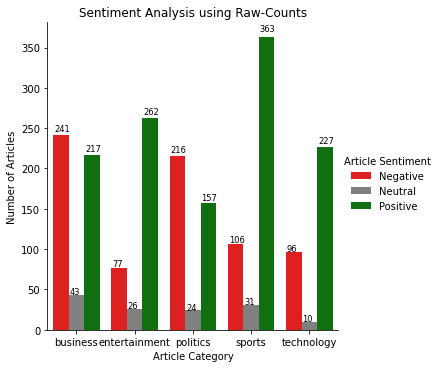

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#Graph the number of positive/negative articles in each category for raw-counts

df = pd.read_csv('output/sentiment/bbc_sentiment_comparison_data.csv')
labels = ['business', 'entertainment', 'politics', 'sports', 'technology']
groupedCategory = df.groupby(['category', 'Article Sentiment'])['title'].count().reset_index()

graph = sns.catplot(x = 'category',       # x variable name
            y = 'title',       # y variable name
            hue = "Article Sentiment",  # group variable name
            data = groupedCategory,     # dataframe to plot
            kind = "bar",
            palette=sns.color_palette(['red', 'grey', 'green']))

ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title("Sentiment Analysis using Raw-Counts")
graph.set(xlabel='Article Category', ylabel='Number of Articles')



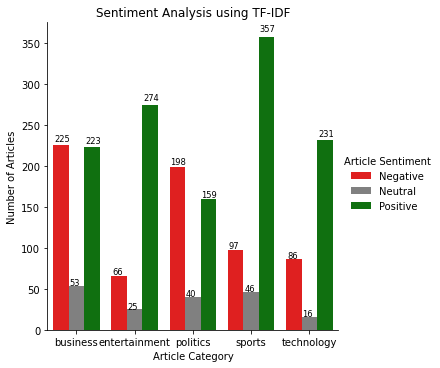

In [5]:

#Graph the number of positive/negative articles in each category for tf-idf
df = pd.read_csv('output/sentiment/bbc_sentiment_analysis_tfidf.csv')
labels = ['business', 'entertainment', 'politics', 'sports', 'technology']
groupedCategory = df.groupby(['category', 'Article Sentiment'])['title'].count().reset_index()

graph2 = sns.catplot(x = 'category',       # x variable name
            y = 'title',       # y variable name
            hue = "Article Sentiment",  # group variable name
            data = groupedCategory,     # dataframe to plot
            kind = "bar",
            palette=sns.color_palette(['red', 'grey', 'green']))

ax = graph2.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title("Sentiment Analysis using TF-IDF")
graph2.set(xlabel='Article Category', ylabel='Number of Articles')


*We then compared the results of the two methods to see how much the differ. Below is a bar chart showing how many articles were classified the same and how many were different using the two methods, by category.*

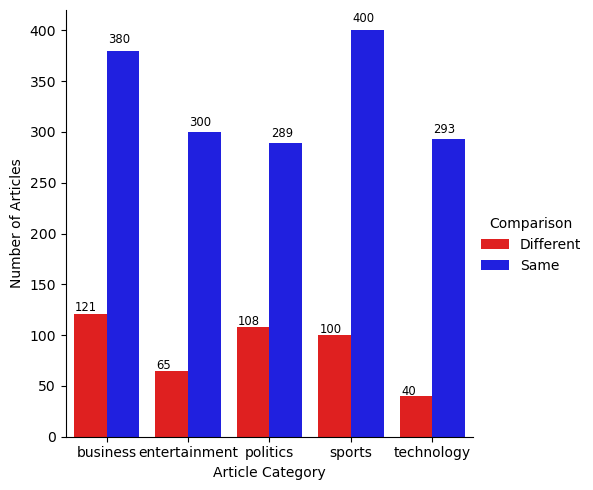

In [7]:
from IPython.display import Image
#Comparison of articles based on their categories
Image(filename = "output/sentiment/Sentiment-RawCount-vs-tfidf-categories.png")

*There is no way to measure the accuracy of the sentiment classification because the sentiments of the article are unlabelled, but both methods give the same classification for more than 50% of the articles in each category.*

For further statistics of the sentiment analysis, run `stats.py` in the data_preparation folder.

## TOPIC CLASSIFICATION
We classified news articles according to the topics they cover: Business, Politics, Entertainment, Sports, or Technology.

Our steps for the topic classification:
- Cleaned the data by employing the methods of punctuation removal, stemming, stop word removal, and contraction expansion, in `clean_data.py` and `helper.py`.
- In `nmf.py`, trained two NMF models, one from the Python library *Gensim*, which was used to find the optimal number of topics to split the articles into. The second NMF model was from the Python library *Scikit-Learn*, and was used to find the best 8 words for each topic.
- Trained a Support Vector Classifier on the TF-IDF term frequency matrices for articles, and their labelled categories, seen in `svc.py`.
- SVC was used to map the five categories of articles.

Below is our accuracy for the topic classification, compared to the original labelled categories of each article, done in `get_accuracy.py`.


In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from matplotlib.lines import Line2D

data = pd.read_csv('output/topic/articles_with_predicted_categories.csv')

categorized_articles_num = data['predicted_category'].count()
source_category = data['category'].count()

grouped = data.groupby(
        ['category', 'predicted_category'])['title'].count().reset_index()

total = data.groupby('category').count()['title'].reset_index()

correctly_classified = grouped[grouped['category'] ==
                                   grouped['predicted_category']]

counts = correctly_classified.merge(total,on='category',how='left')

counts = counts.rename(columns={"title_x": "correctly_classified",
                                    "title_y": "total_articles"}, errors="raise")

counts['percentage'] = (100 * counts['correctly_classified'] /
                            counts['total_articles']).round(2)

print(counts)
category_labels = ['business', 'entertainment', 'politics', 'sports', 'technology']

y_true = np.array(data['category'])
y_pred = np.array(data['predicted_category'])




        category predicted_category  correctly_classified  total_articles  \
0       business           business                   446             501   
1  entertainment      entertainment                   336             365   
2       politics           politics                   379             397   
3         sports             sports                   498             500   
4     technology         technology                   147             333   

   percentage  
0       89.02  
1       92.05  
2       95.47  
3       99.60  
4       44.14  


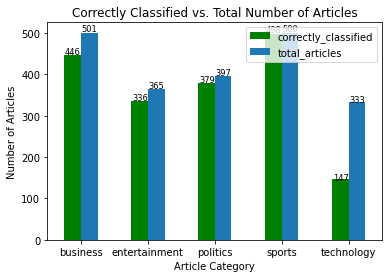

In [13]:
score = precision_recall_fscore_support(
        y_true, y_pred, average=None)

counts = counts.drop('predicted_category', axis=1)

bx = counts[['correctly_classified', 'total_articles']].plot.bar(rot=0, color={"#1f77b4","green"})

bx.set_title("Correctly Classified vs. Total Number of Articles")
bx.set(xlabel='Article Category', ylabel='Number of Articles')
plt.xticks(np.arange(5), category_labels, rotation='horizontal')
for p in bx.patches:
    bx.text(p.get_x() + 0.015,
            p.get_height() * 1.02,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='small', va="center")

bx.legend(loc="upper right")


*As we can see, most topics are classified correctly, except for technology-based articles which have an accuracy of 44.14% which may be because of the overlap of words between sports and technology (ie. words like game, play etc), and entertainment and technology.*


To investigate further why the technology category had so few correctly classified articles, we created this plot (shown below) which illustrates how all the technology articles were classified. As we can see, the majority of the misclassificied technology articles recieved the "entertainment" and "sports" categories as their prediction, with only a few being misclassified as business or politics.

<ipython-input-20-aa3aae931fe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories['match'] = categories['category'] == categories['predicted_category']


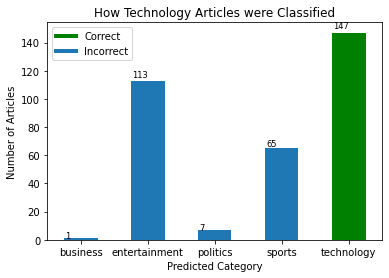

In [20]:
categories = data[['category', 'predicted_category']]
categories['match'] = categories['category'] == categories['predicted_category']

grouped_cat = categories.groupby(['category', 'predicted_category']).count().reset_index()
tech = grouped_cat[grouped_cat['category']=='technology']
_, ax = plt.subplots()
plt.title("How Technology Articles were Classified")
tech.match.plot(kind='bar', ax=ax)
ax.get_children()[4].set_color('g') 

for p in ax.patches:
    ax.text(p.get_x() + 0.015,
            p.get_height() * 1.02,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='small')

plt.xticks(np.arange(5), category_labels, rotation='horizontal')
ax.set(xlabel='Predicted Category', ylabel='Number of Articles')
colors = ['green', '#1f77b4']
lines = [Line2D([0], [0], color=c, linewidth=4) for c in colors]
labels = ['Correct', 'Incorrect']
plt.legend(lines, labels)

## GEOTAGGING

As a final step in our project, we wanted to have a nice data visualization/application for the work we had done. Our initial idea was to create a map based user interface where users could filter newspaper articles based on topics. We have plans to add the sentiments as an option in the future (could not do it because of time constraint).

To do this, we used the Python libraries *spacy* and *geopy*. We used a pretrained spacy model *en_core_web_sm*. We scanned through an articles contents and used the spacy model to label each entity in the article. We then filtered out the Geopolitical Entity (GPE) tags (aka. locations), and counted which location word appeared the most. We then used geopy to get the coordinates for the most common location name for each article, and if an article didn't contain a location, we assigned it to London, since this is where BBC is located.

To install the spacy model, run the cell below.

In [25]:
os.system('python -m spacy download en_core_web_sm')

0

Below is an example of the data with locations.

In [22]:
data = pd.read_csv('output/geo/bbc_articles_with_location.csv')
print(data[['title', 'location', 'lat', 'lng']].head())

                                title location        lat        lng
0   Labour's Cunningham to stand down      NaN  51.509865  -0.118092
1  The memory driving Brown's mission    Kenya   1.441968  38.431397
2   Blair and Brown criticised by MPs  Britain  39.252879 -77.696936
3    Blair returns from peace mission     Iraq  33.095579  44.174978
4     Labour seeks to quell feud talk  Britain  39.252879 -77.696936


*As seen below, we deployed the geotagging application to https://teletubbies-front-end.vercel.app/ for users to interact with our data.*
* *Note: The embedding of the website in this Notebook is displayed **remotely**, but does not seem to be showing up on GitLab.*

In [3]:
from IPython.display import IFrame
IFrame('https://teletubbies-front-end.vercel.app/', width=1200, height=900)